In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [4]:
X,y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)

In [5]:
X

array([[ 1.22410627, -1.48923623],
       [ 0.56142734,  0.48272059],
       [ 0.31405213, -1.45506629],
       ...,
       [ 0.21129244, -0.31054938],
       [-1.2422352 , -0.38693254],
       [ 0.87520943,  1.23280507]])

In [6]:
y

array([-1.86469259e+01,  1.01443801e+01, -2.37188584e+01,  2.02541214e+01,
        1.37965549e+01, -2.55975999e+01, -5.09970058e-01, -4.86130428e+01,
        4.50066554e+00,  2.71052372e+00,  5.32383338e+01, -1.76188086e+01,
       -4.75498067e+00,  3.87403238e+01, -3.68785839e+00,  2.62209577e+01,
       -1.23933754e+01, -2.51554930e+01, -7.58008372e+00, -1.69336790e+01,
       -3.14962165e+00,  2.13285028e+01, -1.67169759e+01, -2.45340440e+01,
        1.84840530e+01, -1.91085169e+01,  1.78576109e+00, -1.87376810e+01,
        1.40541173e+01,  1.96506461e+01, -7.43567941e+00,  4.29641454e+01,
        1.42143608e+00, -3.79445578e+01, -1.86422471e+01,  5.32852246e+01,
       -1.31985204e+01, -1.00469612e+01,  1.16450400e+01, -1.94808341e+01,
       -7.06365660e+00, -1.75566173e+01, -1.35464250e+00, -2.14696622e+01,
        4.33822604e+00,  8.82938315e+00, -1.07375954e+01,  2.06856917e+00,
       -1.59914915e+00,  1.03709790e+01, -6.40580395e+00, -3.06647708e+00,
       -2.24465743e+01, -

In [7]:
pd.DataFrame(X)[0]

0      1.224106
1      0.561427
2      0.314052
3     -0.748257
4      0.541046
         ...   
995   -0.733827
996   -2.194705
997    0.211292
998   -1.242235
999    0.875209
Name: 0, Length: 1000, dtype: float64

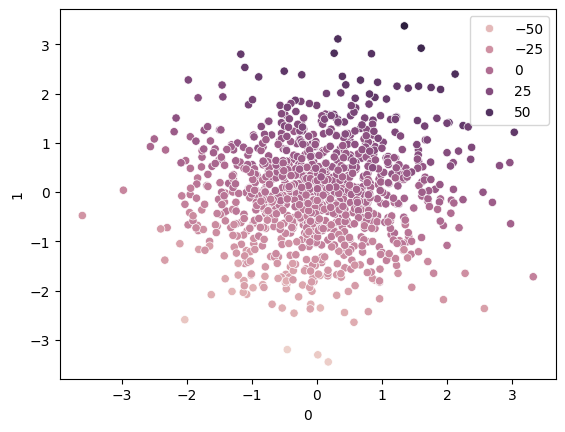

In [13]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1], hue=y)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest, ytrain,ytest = train_test_split(X,y, test_size=0.20, random_state=42)

In [17]:
Xtrain.shape, ytrain.shape

((800, 2), (800,))

In [18]:
Xtest.shape, ytest.shape

((200, 2), (200,))

In [19]:
from sklearn.svm import SVR

model = SVR(kernel='linear')

In [20]:
model.fit(Xtrain,ytrain)

SVR(kernel='linear')

In [21]:
model.coef_

array([[ 5.36757339, 17.90760717]])

In [22]:
ypred = model.predict(Xtest)

In [23]:
from sklearn.metrics import r2_score

print(f"R2 Score : {r2_score(ytest,ypred)}")

R2 Score : 0.9686659236630023


# HpyerParameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV

parameter = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['linear'],
    'epsilon':[0.1, 0.2, 0.3,]
}

In [34]:
gscv_model =  GridSearchCV(SVR(), param_grid=parameter, cv=5, refit=True, verbose=3)

In [35]:
gscv_model.fit(Xtrain,ytrain)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.974 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.976 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.971 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.980 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.970 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.974 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.976 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.971 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.980 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.970 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [36]:
gscv_model.best_params_

{'C': 1000, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [38]:
predict = gscv_model.predict(Xtest)

In [39]:
print(f"R2 Score : {r2_score(ytest,predict)}")

R2 Score : 0.9686806678545065
